### Natural Language Processing with Sklearn

This notebook demonstrates the usage of natural language processing techniques to classify a text message to be 'spam' or 'ham'.


The dataset is available in Kaggle and can be downloaded from https://www.kaggle.com/uciml/sms-spam-collection-dataset



The data set consists of 5572 text messages each of it labeled as 'spam' or 'ham'. The task is to use natural language processing algorithms and machine learning algorithms to correctly classify the messages given the raw text data.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [3]:
data = pd.read_csv('spam.csv', encoding='latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


Removing unnamed columns and renaming the columns v1 and v2

In [5]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace=True)
data.rename(columns={'v1':'Label', 'v2':'Message',}, inplace=True)

In [6]:
data.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
X = data['Message']
y = data['Label']

In [8]:
X.shape

(5572,)

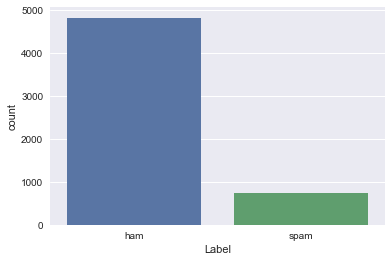

In [9]:
sns.countplot('Label', data = data)

In [10]:
data.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

There are more 'ham' or 'not-spam' messages than 'spam' messages.

Selecting the features and labels.

In [11]:
X = data['Message']
y = data['Label']

Splitting the data into training and testing sets before extracting features from the test data and building machine learning models.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### Feature Extraction

Extracting features from the text data using tfidfvectorizer from sklearn.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

The vectorizer is fit on the training data. Later the training and testing data is transformed using the vectorizer.

In [16]:
X_train = tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

We can also see the features/tokens identified by the vectorizer by accessing the get_feature_names method.

In [18]:
tfidf_vect.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07821230901',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700435505150p',
 '08700469649',
 '08700621170150p',
 '08701213186',
 '08701417012',


In [19]:
len(tfidf_vect.get_feature_names())

7206

As we can see most of them are numbers, abbreviations(short cuts). Also notice that we are not restricting the stopwords here as they might play an important role in classifying a message to be 'spam' or 'ham'.  

We will also see the wether removing stopwords might help with the classification task in the later step.

### Classification

Let us import different models and evaluation metrics. 

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier



lr = LogisticRegression()
nb = MultinomialNB()
knc = KNeighborsClassifier()
svc = SVC(gamma = 'auto')
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()



models = {'Logistic Regression':lr, 'Naive Bayes classifier':nb, 'k-nearest neighbors':knc, 
          'Support Vector Machine':svc, 'Decision Tree Classifier':dtc, 
          'Random Forest Classifier':rfc, 'Gradient Boosting Classifier':gbc, 'AdaBoost Classifier':abc}

Writing a function to fit the model on training data and make predictions on test data.

In [22]:
def eval_model(model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    test_accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['ham', 'spam'], index=['ham','spam'])
    
    return test_accuracy, conf_matrix

In [23]:
test_accuracies = []
confusion_matrices = []
for name, model in models.items():
    test_acc, conf_matrix = eval_model(model) 
    test_accuracies.append(test_acc)
    confusion_matrices.append(conf_matrix)
    print(f'{name} ---> Test accuracy - {test_acc*100:.2f}%')

D:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression ---> Test accuracy - 96.59%
Naive Bayes classifier ---> Test accuracy - 95.99%
k-nearest neighbors ---> Test accuracy - 91.21%
Support Vector Machine ---> Test accuracy - 86.90%
Decision Tree Classifier ---> Test accuracy - 96.29%
Random Forest Classifier ---> Test accuracy - 97.91%
Gradient Boosting Classifier ---> Test accuracy - 96.77%
AdaBoost Classifier ---> Test accuracy - 97.13%


In [24]:
results = pd.DataFrame(test_accuracies, index=list(models.keys()), columns=['test_acc'])
results

,test_acc
Logistic Regression,0.965909
Naive Bayes classifier,0.959928
k-nearest neighbors,0.912081
Support Vector Machine,0.869019
Decision Tree Classifier,0.962919
Random Forest Classifier,0.979067
Gradient Boosting Classifier,0.967703
AdaBoost Classifier,0.971292


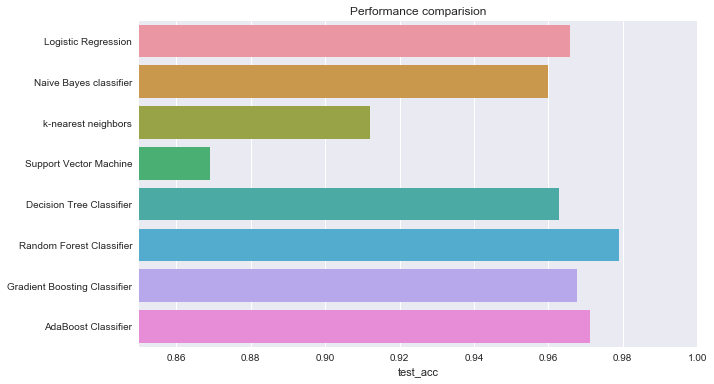

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x ='test_acc', y=results.index, data=results)
plt.xlim(0.85, 1.0)
plt.title('Performance comparision')
plt.show()

Looks like SVM and K-nearest neighbors are not a good choice for this task. The performance of all the other models is almost similar in this case.

Now let us include the effect of stopwords by passing the 'english' keyword to the stopwords argument to the tfidf vectorizer.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

tfidf_vect = TfidfVectorizer(stop_words='english')

X_train = tfidf_vect.fit_transform(X_train)
X_test = tfidf_vect.transform(X_test)

In [27]:
len(tfidf_vect.get_feature_names())

6946

Notice a decrease in number of features of the vectorizer after removing the stopwords from 7206 to 6946.


Lets initialize the same models again to fit them on the features without stopwords.

In [29]:
lr = LogisticRegression()
nb = MultinomialNB()
knc = KNeighborsClassifier()
svc = SVC(gamma = 'auto')
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=100)
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()



models = {'Logistic Regression':lr, 'Naive Bayes classifier':nb, 'k-nearest neighbors':knc, 
          'Support Vector Machine':svc, 'Decision Tree Classifier':dtc, 
          'Random Forest Classifier':rfc, 'Gradient Boosting Classifier':gbc, 'AdaBoost Classifier':abc}

In [30]:
test_accuracies_no_stopwords = []
confusion_matrices_no_stopwords = []
for name, model in models.items():
    test_acc, conf_matrix = eval_model(model) 
    test_accuracies_no_stopwords.append(test_acc)
    confusion_matrices_no_stopwords.append(conf_matrix)
    print(f'{name} ---> Test accuracy - {test_acc*100:.2f}%')

D:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression ---> Test accuracy - 95.28%
Naive Bayes classifier ---> Test accuracy - 96.77%
k-nearest neighbors ---> Test accuracy - 90.91%
Support Vector Machine ---> Test accuracy - 86.90%
Decision Tree Classifier ---> Test accuracy - 96.77%
Random Forest Classifier ---> Test accuracy - 97.67%
Gradient Boosting Classifier ---> Test accuracy - 95.69%
AdaBoost Classifier ---> Test accuracy - 96.59%


In [31]:
results['test_acc_without_stopwords'] = pd.Series(test_accuracies_no_stopwords, index=list(models.keys()))
results

,test_acc,test_acc_without_stopwords
Logistic Regression,0.965909,0.952751
Naive Bayes classifier,0.959928,0.967703
k-nearest neighbors,0.912081,0.909091
Support Vector Machine,0.869019,0.869019
Decision Tree Classifier,0.962919,0.967703
Random Forest Classifier,0.979067,0.976675
Gradient Boosting Classifier,0.967703,0.956938
AdaBoost Classifier,0.971292,0.965909


As we can see from the results there is not much of an improvment after removing stopwords.

In [38]:
def plot_confusion_matrices(models, confusion_matrices):
    fig, axs = plt.subplots(2,4, figsize=(12,6)) 

    m = 0
    for i, ax_r in enumerate(axs):
        for j, ax in enumerate(ax_r):
            sns.heatmap(confusion_matrices[m], annot=True, cbar=False, cmap='Blues', fmt='g', ax = ax)
            ax.set_xlabel('Predicted label')
            ax.set_ylabel('True label')
            ax.set_title(f'{list(models.keys())[m]}', fontsize=12, fontweight='bold')
            m += 1

    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.35)
    plt.tight_layout()
    plt.show()
    

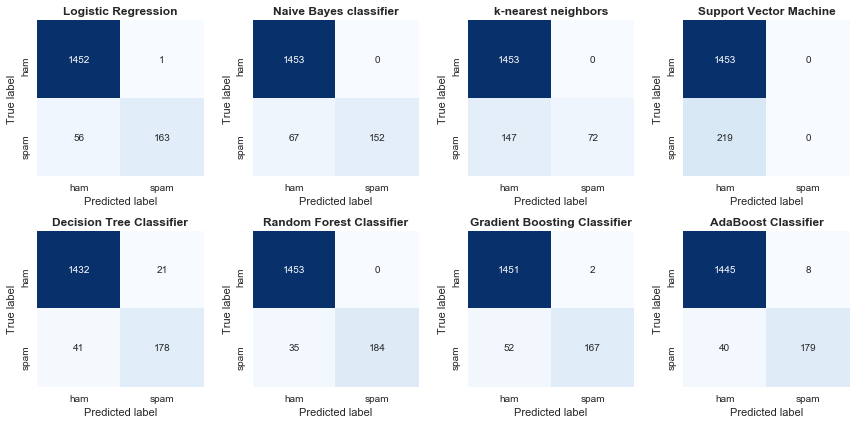

In [39]:
plot_confusion_matrices(models, confusion_matrices)

### Building a Pipeline

Finally let us build a pipeline to fit and predict on raw text data.

In [40]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer()),
    ('classifier', RandomForestClassifier(n_estimators=100))
])

Splitting the data oncemore, to make sure the 'eval_model' function uses the right data for fitting and evaluating the model.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

We can use the same function to fit and predict with the pipeline

In [42]:
test_acc, conf_matrix = eval_model(pipeline) 

print('Test accuracy - ',test_acc)
print('Confusion matrix - \n', conf_matrix)

Test accuracy -  0.9748803827751196
Confusion matrix - 
        ham  spam
ham   1453     0
spam    42   177


As seen from the confusion matrix, 39 'spam' messages are being predicted as 'ham' messages

In [44]:
print('Classification Report \n', classification_report(y_test, pipeline.predict(X_test)))

Classification Report 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1453
        spam       1.00      0.81      0.89       219

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672



Another good thing about pipeline is, we can directly make predictions on new raw text messages.

Lets create some text messages and predict if they are 'spam' or 'ham'.

In [45]:
messages = ['Thank you for subscribing! You will be notified when you win your 1 Million Dollar prize money! Please call our customer service representative on 0800012345 for further details ',
          'Hi, hope you are doing well. Please call me as soon as possible!']

In [48]:
pipeline.predict(messages)

array(['spam', 'ham'], dtype=object)

The model correctly identifies the first message to be 'spam'.